In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import pyqosc as qo
import scipy as sp

options = qt.Options(nsteps = int(1e9))
plt.rcParams.update({"font.size" : 13})

(array([ 0.        ,  0.00314159,  0.00628319, ..., -0.00942478,
        -0.00628319, -0.00314159]),
 array([1.00000000e+00, 4.05244208e-01, 2.50000008e-09, ...,
        4.50271350e-02, 2.50000008e-09, 4.05244208e-01]),
 0.0)

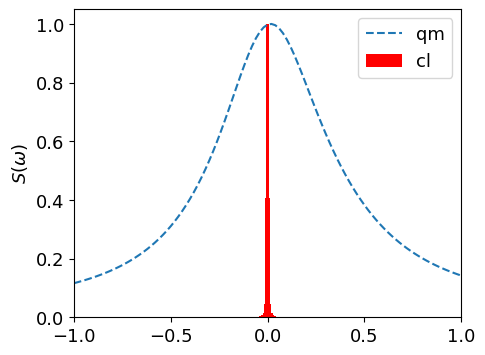

In [6]:
N = 20
vdp = qo.vdp(N=20, omega = 1.1)
rho_0 = qt.coherent_dm(N, -1+1j)

omega = np.linspace(-1,1,101)
omega_lim = np.max(omega)

tlst_ss, r, phi, beta_ss = vdp.adler(t_end = 1e4,
                                     t_eval = 1e3,
                                     timepoints_returned=int(1e4),
                                     rho_0 = rho_0,
                                     one_cycle = False)

qo.ss_q_spectrum(lindblad = vdp.dynamics(),
                 omega = omega,
                 plot = True)

qo.ss_c_spectrum(tlst_ss, beta_ss, 
                 omega_lim = omega_lim,
                 plot = True,
                 plot_bar = True,
                 overlap_with = plt.gca(),
                 width = 0.02,
                 label = "cl",
                 color = "r")